In [16]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import mplfinance as mpf

In [17]:
# Download data from Yahoo Finance
df = yf.download("^NSEI", start="2020-01-01", end="2024-01-09")

# Change column names from upper to lower case
df. columns = df.columns.str.lower()

[*********************100%%**********************]  1 of 1 completed


In [18]:
# Add column for fast moving average (ema_8) and slow moving average (ema_21)
df["ema_8"] = ta.ema(df.close, length=8)
df["ema_21"] = ta.ema(df.close, length=21)

# Remove rows with missing values
df = df.dropna()

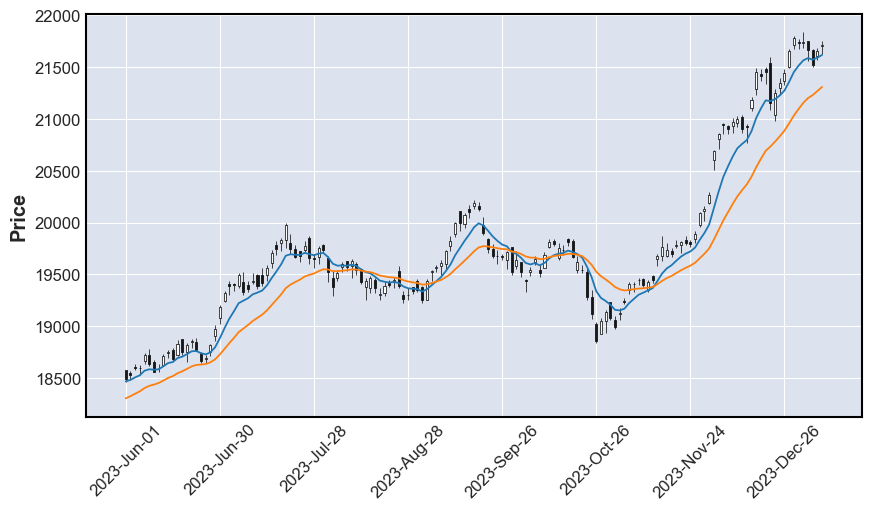

In [19]:
data_x = df[-150: -1]
adp = [mpf.make_addplot(data_x["ema_8"], type="line"), mpf.make_addplot(data_x["ema_21"], type="line")]
mpf.plot(data_x, type="candle", figratio=(15,8), addplot=adp)

In [20]:
# Initialise the signal colum with 0
data_x["signal"] = 0 

# Add a long signal when ema_8 crosses over ema_21 anf compare with perious bar
data_x.loc[(data_x["ema_8"] > data_x["ema_21"]), "signal"] = 1

# Add a short signal when ema_8 crosses below ema_21 anf compare with perious bar
data_x.loc[(data_x["ema_8"] < data_x["ema_21"]), "signal"] = -1

data_x["close_shifted"] = data_x["close"].shift(-1)
data_x.dropna(subset=["close_shifted"])

C:\Users\iamlo\AppData\Local\Temp\ipykernel_13336\4212288799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x["signal"] = 0
C:\Users\iamlo\AppData\Local\Temp\ipykernel_13336\4212288799.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x["close_shifted"] = data_x["close"].shift(-1)


,open,high,low,close,adj close,volume,ema_8,ema_21,signal,close_shifted
Date,,,,,,,,,,
2023-06-01,18579.400391,18580.300781,18464.550781,18487.750000,18487.750000,265600,18468.786911,18305.343314,1,18534.099609
2023-06-02,18550.849609,18573.699219,18478.400391,18534.099609,18534.099609,270900,18483.300844,18326.139341,1,18593.849609
2023-06-05,18612.000000,18640.150391,18582.800781,18593.849609,18593.849609,256100,18507.867236,18350.476638,1,18599.000000
2023-06-06,18600.800781,18622.750000,18531.599609,18599.000000,18599.000000,220800,18528.118961,18373.069671,1,18726.400391
2023-06-07,18665.599609,18738.949219,18636.000000,18726.400391,18726.400391,260100,18572.181501,18405.190646,1,18634.550781
...,...,...,...,...,...,...,...,...,...,...
2023-12-29,21737.650391,21770.300781,21676.900391,21731.400391,21731.400391,270900,21514.051539,21095.790749,1,21741.900391
2024-01-01,21727.750000,21834.349609,21680.849609,21741.900391,21741.900391,154000,21564.684617,21154.527990,1,21665.800781
2024-01-02,21751.349609,21755.599609,21555.650391,21665.800781,21665.800781,263700,21587.154876,21201.007334,1,21517.349609
